In [1]:
# Upload packages

import pandas as pd
import numpy as np
from dfply import *
import scipy.stats as Kruskal
from scipy.stats import mstats
import statsmodels.api as sa
import scikit_posthocs as sp
from statsmodels.multivariate.manova import MANOVA
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats

In [2]:
Metaphlan4 = pd.read_csv('~/Desktop/To_prediction/Metaphlan4_all_pheno.csv').rename(columns={'Unnamed: 0' : 'External ID'})
Metaphlan4 = Metaphlan4.set_index('External ID')
Metaphlan4

,k__Bacteria,p__Firmicutes,p__Bacteroidetes,p__Proteobacteria,p__Actinobacteria,c__Clostridia,c__Bacteroidia,c__Negativicutes,c__Firmicutes_unclassified,c__Betaproteobacteria,...,t__SGB47656,t__SGB14139,t__SGB1890,s__Prevotella_sp_DNF00663,s__Collinsella_SGB14747,t__SGB3322,t__SGB14747,t__SGB4194,t__SGB6499,t__SGB4510
External ID,,,,,,,,,,,,,,,,,,,,,
PSM7J14T,100.00000,71.02855,26.85212,1.89661,0.22272,55.95542,26.85212,12.28881,2.64634,0.98112,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CSM79HOL,100.00000,34.80297,63.49096,1.49113,0.21495,30.54465,63.49096,2.56962,0.32024,1.44817,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CSM67U9D,100.00000,54.68728,44.23327,0.82266,0.25679,50.51548,44.23327,2.28682,0.51562,0.73302,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
MSM6J2MF,100.00000,96.47442,0.24335,3.10878,0.16437,82.71787,0.24335,13.23502,0.51562,0.73302,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
HSM7J4N4,100.00000,27.30707,71.32484,1.35394,0.01415,25.32084,71.32484,1.39104,0.44382,0.01219,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MSMA26BL,100.00000,36.18427,61.89923,1.72077,0.19572,34.43199,61.89923,1.54756,0.03789,1.05422,...,0.01596,0.00765,0.00649,0.02668,0.01905,0.02668,0.01905,0.21992,0.02074,0.01415
MSM79H9A,99.84673,36.69046,58.88541,0.98279,0.58879,33.53007,58.88541,0.38769,0.00567,0.04974,...,0.01596,0.00765,0.00649,0.02668,0.01905,0.02668,0.01905,0.21992,0.02074,0.01415
HSM7J4KK,100.00000,33.89929,62.37670,1.84729,0.81156,31.61819,62.23758,0.55590,0.16380,0.93262,...,0.01596,0.00765,0.00649,0.02668,0.01905,0.02668,0.01905,0.21992,0.02074,0.01415


Selected only one sample per patient from MGX data

In [263]:
select_sampels = pd.read_csv('~/Desktop/selected_samples_MGX.csv')
select_sampels = select_sampels.set_index('External ID')
select_sampels.drop("Participant ID", inplace=True, axis=1)

Only kept samples containing species

In [264]:
Metaphlan4_s = Metaphlan4.loc[select_sampels.index,:]
Metaphlan4_s = Metaphlan4_s.loc[:,Metaphlan4_s.columns.str.startswith('s__')]
Metaphlan4_s["diagnosis"] = select_sampels.iloc[:,-1]
Metaphlan4_s

,s__Phocaeicola_vulgatus,s__Eubacterium_rectale,s__Dialister_invisus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Faecalibacterium_prausnitzii,s__Bacteroides_xylanisolvens,s__Firmicutes_bacterium_AF16_15,s__Bacteroides_uniformis,s__Ruminococcus_bromii,...,s__GGB3632_SGB4921,s__GGB4710_SGB6522,s__GGB4706_SGB6513,s__GGB3643_SGB4948,s__Sanguibacteroides_SGB1777,s__GGB3632_SGB4920,s__Lachnospiraceae_bacterium_NSJ_46,s__Prevotella_sp_DNF00663,s__Collinsella_SGB14747,diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM67UA2,36.02530,1.45700,1.91898,1.34449,0.03810,0.90627,19.83516,0.28439,17.15467,0.03724,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,CD
CSM5MCVN,51.31297,0.95498,1.54371,0.04588,0.18414,1.99150,7.95270,0.01466,18.67487,0.34879,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,CD
CSM67UBZ,0.00313,1.29919,1.03434,2.82078,0.00694,10.84042,1.39625,0.00558,16.65207,1.02143,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,UC
CSM5MCXL,32.29455,3.46622,2.09791,9.10884,0.71850,2.63304,0.00904,0.55343,12.83634,0.12034,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,UC
CSM5MCY8,40.22876,0.56787,0.15291,0.04742,0.30914,2.20589,0.01291,0.15447,8.33000,0.22200,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSM7J19N,5.47393,1.38623,1.06951,0.02240,0.60937,4.65083,2.58785,0.71590,4.14365,0.16762,...,0.05911,0.18696,0.23143,0.01579,0.00464,0.04352,0.01596,0.02668,0.01905,nonIBD
PSM6XBW3,10.50664,0.27922,0.37723,0.32395,0.08358,3.69814,0.32749,0.19103,1.19686,0.13442,...,0.05911,0.18696,0.23143,0.01579,0.00464,0.04352,0.01596,0.02668,0.01905,nonIBD
PSM7J12J,0.00515,1.51739,2.24522,1.38714,0.20735,4.37121,1.14150,0.01921,7.01159,0.22608,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,CD


In [265]:
Metaphlan4_g = Metaphlan4.loc[select_sampels.index,:]
Metaphlan4_g = Metaphlan4_g.loc[:,Metaphlan4_g.columns.str.startswith('g__')]
Metaphlan4_g["diagnosis"] = select_sampels.iloc[:,-1]
Metaphlan4_g

,g__Phocaeicola,g__Lachnospiraceae_unclassified,g__Roseburia,g__Dialister,g__Bacteroides,g__Faecalibacterium,g__Ruminococcus,g__Clostridium,g__Firmicutes_unclassified,g__Blautia,...,g__Metakosakonia,g__GGB3360,g__GGB4698,g__GGB1095,g__GGB4700,g__GGB3632,g__GGB4710,g__GGB4706,g__GGB3643,diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM67UA2,36.02530,0.24870,1.41109,1.91898,29.37977,0.90627,0.00200,1.97270,0.28439,0.18511,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,CD
CSM5MCVN,51.31297,0.95498,0.09775,1.54371,24.80445,2.01065,0.41492,0.57508,0.02109,0.00774,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,CD
CSM67UBZ,27.95174,0.10110,0.88053,1.03434,35.13314,10.84042,1.02143,0.21438,0.00558,0.41636,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,UC
CSM5MCXL,32.30209,3.61089,0.71850,2.09791,41.99785,2.77347,0.12034,0.86480,0.55343,0.07534,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,UC
CSM5MCY8,23.67946,0.80012,0.74112,0.15291,29.51775,2.52757,0.44086,0.77077,0.15447,0.15406,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSM7J19N,5.47393,3.13170,1.41906,0.04425,8.03116,4.65083,0.54969,1.57238,0.71590,0.41338,...,0.60894,0.05328,0.08244,0.58471,0.05404,0.05911,0.18696,0.23143,0.01579,nonIBD
PSM6XBW3,10.50664,0.05541,0.73990,0.37723,3.88843,5.08546,0.60674,0.02327,0.19103,1.08172,...,0.60894,0.05328,0.08244,0.58471,0.05404,0.05911,0.18696,0.23143,0.01579,nonIBD
PSM7J12J,0.00515,1.65384,3.50472,2.24522,27.53487,4.37121,0.43576,0.07843,0.02907,0.02966,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,CD


Only kept samples containing genus


In [266]:
p_val2genus = {}
for column in Metaphlan4_g.columns:
    data = [Metaphlan4_g.loc[ids, column].values for ids in Metaphlan4_g.groupby('diagnosis').groups.values()]

    H, p = Kruskal.kruskal(*data)
    cross_Metaphlan4 = sp.posthoc_conover(Metaphlan4_g, val_col=column, group_col='diagnosis', p_adjust = 'fdr_by')
    if p <0.05:
        p_val2genus[column] = p
        print(f'{cross_Metaphlan4} \nname species:{column}, p_val:{round(p,2)}\n######################################')

              CD        UC    nonIBD
CD      1.000000  0.678930  0.018574
UC      0.678930  1.000000  0.006627
nonIBD  0.018574  0.006627  1.000000 
name species:g__GGB3746, p_val:0.0
######################################
              CD        UC    nonIBD
CD      1.000000  0.008497  0.789251
UC      0.008497  1.000000  0.077348
nonIBD  0.789251  0.077348  1.000000 
name species:g__Alistipes, p_val:0.01
######################################
              CD        UC    nonIBD
CD      1.000000  0.066384  0.961502
UC      0.066384  1.000000  0.238175
nonIBD  0.961502  0.238175  1.000000 
name species:g__Coprococcus, p_val:0.04
######################################
              CD        UC    nonIBD
CD      1.000000  0.000121  0.073493
UC      0.000121  1.000000  0.088033
nonIBD  0.073493  0.088033  1.000000 
name species:g__Odoribacter, p_val:0.0
######################################
              CD        UC    nonIBD
CD      1.000000  0.656015  0.037120
UC      0.656015  1.00

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scikit_posthocs/_posthocs.py:222: RuntimeWarning: invalid value encountered in sqrt
  t_value = diff / np.sqrt(S2 * B * D)


In [267]:
df_p_val2genus = pd.DataFrame.from_dict(p_val2genus,orient='index',columns={"p_val"})
df_p_val2genus

,p_val
g__GGB3746,3.971157e-03
g__Alistipes,6.906075e-03
g__Coprococcus,4.090579e-02
g__Odoribacter,2.253014e-04
g__Intestinibacter,7.741591e-03
...,...
g__GGB3632,1.554754e-12
g__GGB4710,1.175678e-12
g__GGB4706,1.410792e-12
g__GGB3643,1.554754e-12


In [268]:
from statsmodels.stats.multitest import fdrcorrection
df_p_val2genus['p_adj']=fdrcorrection(pvals=df_p_val2genus['p_val'], alpha=0.05, method='negcorr', is_sorted=False)[1]
df_p_val2species = df_p_val2genus[df_p_val2genus['p_adj']<0.05]
df_p_val2species

,p_val,p_adj
g__GGB3746,3.971157e-03,3.032654e-02
g__Odoribacter,2.253014e-04,1.866030e-03
g__Anaerofustis,2.048035e-08,2.281634e-07
g__GGB3463,7.900859e-09,9.198843e-08
g__GGB9478,1.510947e-10,2.235614e-09
...,...,...
g__GGB3632,1.554754e-12,3.372971e-11
g__GGB4710,1.175678e-12,2.760272e-11
g__GGB4706,1.410792e-12,3.131134e-11
g__GGB3643,1.554754e-12,3.372971e-11


In [286]:
####################################################################################
#worng
####################################################################################
Metaphlan4_one_h = Metaphlan4_s.isin([0])
Metaphlan4_one_h.replace({False: 1, True: 0}, inplace=True)
Metaphlan4_one_h["diagnosis"] = Metaphlan4_s["diagnosis"]
display(Metaphlan4_one_h)
pd.pivot_table(Metaphlan4_one_h, columns=Metaphlan4_one_h.diagnosis, values=Metaphlan4_one_h.columns)

# Metaphlan4_one_h = Metaphlan4_one_h.drop("diagnosis",axis=1)
# Metaphlan4_one_h
# plt.figure(figsize=(20,30))
# sns.heatmap(Metaphlan4_one_h,
#             cmap="YlGnBu",
#             cbar_kws={'label': 'Missing Data'})

,s__Phocaeicola_vulgatus,s__Eubacterium_rectale,s__Dialister_invisus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Faecalibacterium_prausnitzii,s__Bacteroides_xylanisolvens,s__Firmicutes_bacterium_AF16_15,s__Bacteroides_uniformis,s__Ruminococcus_bromii,...,s__GGB3632_SGB4921,s__GGB4710_SGB6522,s__GGB4706_SGB6513,s__GGB3643_SGB4948,s__Sanguibacteroides_SGB1777,s__GGB3632_SGB4920,s__Lachnospiraceae_bacterium_NSJ_46,s__Prevotella_sp_DNF00663,s__Collinsella_SGB14747,diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM67UA2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,CD
CSM5MCVN,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,CD
CSM67UBZ,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,UC
CSM5MCXL,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,UC
CSM5MCY8,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSM7J19N,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,nonIBD
PSM6XBW3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,nonIBD
PSM7J12J,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,CD


diagnosis,CD,UC,nonIBD
s__Abiotrophia_sp_HMSC24B09,0.972222,0.000000,0.000000
s__Acholeplasmatales_unclassified_SGB6584,0.000000,0.791667,0.000000
s__Acidaminococcaceae_bacterium,0.000000,0.791667,0.652174
s__Acidaminococcaceae_unclassified_SGB5785,0.944444,0.875000,0.000000
s__Acidaminococcus_intestini,1.000000,1.000000,0.956522
...,...,...,...
s__Weissella_viridescens,0.000000,0.000000,0.869565
s__Wohlfahrtiimonas_chitiniclastica,0.666667,0.000000,0.000000
s__Xanthomonas_campestris,0.000000,0.708333,0.000000
s__Yersinia_enterocolitica,0.527778,0.000000,0.000000


In [277]:
Metaphlan2kruskal = Metaphlan4_s.copy()
Metaphlan2kruskal= Metaphlan2kruskal.reset_index().drop(columns= "External ID")
p_Metaphlan2kruskal = pd.pivot_table(Metaphlan2kruskal, columns="diagnosis", values=Metaphlan2kruskal.columns)
CD = p_Metaphlan2kruskal["CD"]
UC = p_Metaphlan2kruskal["UC"]
nonIBD = p_Metaphlan2kruskal["nonIBD"]
display(p_Metaphlan2kruskal)
stats.kruskal(CD, UC, nonIBD)# Display difference between phenotype
p_Metaphlan2kruskal.loc[['s__Lachnospiraceae_bacterium_NSJ_46']]

diagnosis,CD,UC,nonIBD
s__Abiotrophia_sp_HMSC24B09,0.009596,0.000000,0.000000
s__Acholeplasmatales_unclassified_SGB6584,0.000000,4.553488,0.000000
s__Acidaminococcaceae_bacterium,0.000000,0.000945,0.001359
s__Acidaminococcaceae_unclassified_SGB5785,0.570118,0.284757,0.000000
s__Acidaminococcus_intestini,3.246375,2.474383,0.744939
...,...,...,...
s__Weissella_viridescens,0.000000,0.000000,0.003696
s__Wohlfahrtiimonas_chitiniclastica,0.009407,0.000000,0.000000
s__Xanthomonas_campestris,0.000000,0.094067,0.000000
s__Yersinia_enterocolitica,0.008318,0.000000,0.000000


diagnosis,CD,UC,nonIBD
s__Lachnospiraceae_bacterium_NSJ_46,0.0,0.0,0.004222


In [ ]:
list_columns_name = str(list(df_p_val2species.T.columns))
list_columns_name = list_columns_name.replace(",","+")
list_columns_name = list_columns_name.replace("'","")
list_columns_name = list_columns_name.replace("[","")
list_columns_name = list_columns_name.replace("]","")
formula = ((list_columns_name[::-1].replace('+','~',1))[::-1])
formula

In [239]:
features = Metaphlan4.iloc[:, 1:-1]
targets = Metaphlan4.iloc[:, -1]
# features.reset_index(inplace=True)
# features.drop("External ID",axis=1, inplace=True)
features

,s__Eubacterium_rectale,s__Dialister_invisus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Faecalibacterium_prausnitzii,s__Bacteroides_xylanisolvens,s__Firmicutes_bacterium_AF16_15,s__Bacteroides_uniformis,s__Ruminococcus_bromii,s__Roseburia_intestinalis,...,s__GGB4700_SGB6506,s__GGB3632_SGB4921,s__GGB4710_SGB6522,s__GGB4706_SGB6513,s__GGB3643_SGB4948,s__Sanguibacteroides_SGB1777,s__GGB3632_SGB4920,s__Lachnospiraceae_bacterium_NSJ_46,s__Prevotella_sp_DNF00663,s__Collinsella_SGB14747
External ID,,,,,,,,,,,,,,,,,,,,,
CSM67UA2,1.45700,1.91898,1.34449,0.03810,0.90627,19.83516,0.28439,17.15467,0.03724,0.06761,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CSM5MCVN,0.95498,1.54371,0.04588,0.18414,1.99150,7.95270,0.01466,18.67487,0.34879,0.03943,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CSM67UBZ,1.29919,1.03434,2.82078,0.00694,10.84042,1.39625,0.00558,16.65207,1.02143,0.86333,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CSM5MCXL,3.46622,2.09791,9.10884,0.71850,2.63304,0.00904,0.55343,12.83634,0.12034,7.16290,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
CSM5MCY8,0.56787,0.15291,0.04742,0.30914,2.20589,0.01291,0.15447,8.33000,0.22200,0.41153,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSM7J19N,1.38623,1.06951,0.02240,0.60937,4.65083,2.58785,0.71590,4.14365,0.16762,0.69255,...,0.05404,0.05911,0.18696,0.23143,0.01579,0.00464,0.04352,0.01596,0.02668,0.01905
PSM6XBW3,0.27922,0.37723,0.32395,0.08358,3.69814,0.32749,0.19103,1.19686,0.13442,0.32380,...,0.05404,0.05911,0.18696,0.23143,0.01579,0.00464,0.04352,0.01596,0.02668,0.01905
PSM7J12J,1.51739,2.24522,1.38714,0.20735,4.37121,1.14150,0.01921,7.01159,0.22608,0.60271,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [349]:
pca = PCA(n_components=3).fit(features)
X_pca = pca.transform(features)
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = list(features.columns)
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
print(most_important_names)
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))
df

['s__Prevotella_copri_clade_A', 's__Prevotella_marseillensis', 's__Prevotella_copri_clade_A']


,0,1
0,PC1,s__Prevotella_copri_clade_A
1,PC2,s__Prevotella_marseillensis
2,PC3,s__Prevotella_copri_clade_A


2022-10-26 12:34:08,280 WARNING: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
2022-10-26 12:34:08,362 WARNING: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
2022-10-26 12:34:08,420 WARNING: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:title={'center':'PCA'}, xlabel='PC 1', ylabel='PC 2'>

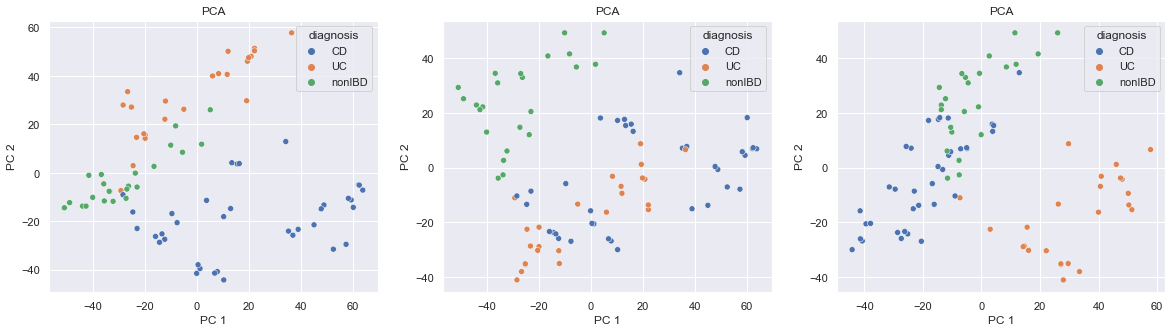

In [464]:
list_columns = list(features.columns)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA")
sns.scatterplot(X_pca[:,0],X_pca[:,1],hue=Metaphlan4['diagnosis'])
plt.subplot(1,3,2)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA")
sns.scatterplot(X_pca[:,0],X_pca[:,2],hue=Metaphlan4['diagnosis'])
plt.subplot(1,3,3)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA")
sns.scatterplot(X_pca[:,1],X_pca[:,2], hue=Metaphlan4['diagnosis'])

<AxesSubplot:>

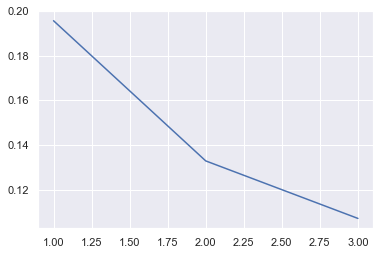

In [305]:
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,4))

In [455]:
xx =(pd.DataFrame(pca.components_,columns=features.columns,index = ['PC-1','PC-2','PC-3']))
xx = xx.T
xx

,PC-1,PC-2,PC-3
s__Eubacterium_rectale,-0.002681,0.030297,-0.028919
s__Dialister_invisus,0.009189,-0.014222,-0.005977
s__Roseburia_faecis,0.002422,-0.011214,-0.022349
s__Roseburia_inulinivorans,-0.000967,0.001866,0.001418
s__Faecalibacterium_prausnitzii,-0.003352,0.022088,-0.026082
...,...,...,...
s__Sanguibacteroides_SGB1777,-0.000032,-0.000006,0.000052
s__GGB3632_SGB4920,-0.000243,-0.000026,0.000431
s__Lachnospiraceae_bacterium_NSJ_46,-0.000025,0.000009,0.000072
s__Prevotella_sp_DNF00663,-0.000162,-0.000022,0.000276
